1. Experiment Objective:

This is a binary image classification experiment that utilizes a deep neural network to classify two image subjects, icecream and waffles. The data is sourced from kaggle (https://www.kaggle.com/sapal6/waffles-or-icecream) and our use is compliant with Kaggle's TOS. We chose this dataset, and the subsequent training examples, because some of the images contain similarities (like icecream in a waffle cone). The images are classified in a deep neural network, that utilizes a Keras wrapper. The model is compiled using the adam optimizer (stochastic gradient descent) and losses between labels and predictions are calculated via sparse categorical crossentropy.
    

2. Data Collection and Preprocessing

In [44]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from IPython.display import Image
import os
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [45]:
import pathlib

imgdir_path = pathlib.Path('waffle_icecream')

file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])

print(file_list)


['waffle_icecream/icecream_0001.jpg', 'waffle_icecream/icecream_0003.jpg', 'waffle_icecream/icecream_0004.jpg', 'waffle_icecream/icecream_0005.jpg', 'waffle_icecream/icecream_0006.jpg', 'waffle_icecream/icecream_0007.jpg', 'waffle_icecream/icecream_0008.jpg', 'waffle_icecream/icecream_0009.jpg', 'waffle_icecream/icecream_0010.jpg', 'waffle_icecream/icecream_0011.jpg', 'waffle_icecream/icecream_0012.jpg', 'waffle_icecream/icecream_0017.jpg', 'waffle_icecream/icecream_0018.jpg', 'waffle_icecream/icecream_0019.jpg', 'waffle_icecream/icecream_0020.jpg', 'waffle_icecream/icecream_0021.jpg', 'waffle_icecream/icecream_0022.jpg', 'waffle_icecream/icecream_0023.jpg', 'waffle_icecream/icecream_0024.jpg', 'waffle_icecream/icecream_0025.jpg', 'waffle_icecream/icecream_0027.jpg', 'waffle_icecream/icecream_0028.jpg', 'waffle_icecream/icecream_0029.jpg', 'waffle_icecream/icecream_0031.jpg', 'waffle_icecream/icecream_0032.jpg', 'waffle_icecream/icecream_0034.jpg', 'waffle_icecream/icecream_0035.jpg', 

Image shape:  (500, 500, 3)
Image shape:  (500, 500, 3)
Image shape:  (500, 375, 3)
Image shape:  (500, 333, 3)
Image shape:  (500, 329, 3)
Image shape:  (500, 500, 3)
Image shape:  (500, 333, 3)


ValueError: num must be 1 <= num <= 6, not 7

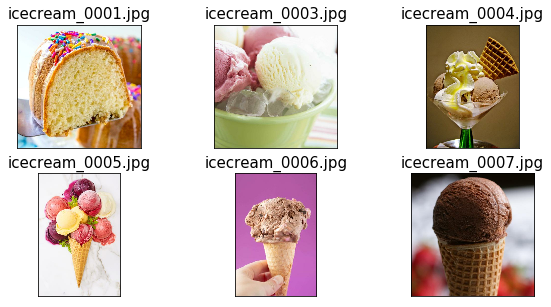

In [46]:
import matplotlib.pyplot as plt
import os


fig = plt.figure(figsize=(10, 5))
for i,file in enumerate(file_list):
    img_raw = tf.io.read_file(file)
    img = tf.image.decode_image(img_raw)
    print('Image shape: ', img.shape)
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)
    
plt.tight_layout()
plt.show()

In [ ]:
labels = [1 if 'icecream' in os.path.basename(file) else 0
          for file in file_list]

ds_files_labels = tf.data.Dataset.from_tensor_slices(
    (file_list, labels))

for item in ds_files_labels:
    print(item[0].numpy(), item[1].numpy())

(150, 150, 3) 1
(150, 150, 3) 1
(150, 150, 3) 1
(150, 150, 3) 1
(150, 150, 3) 1
(150, 150, 3) 1
(150, 150, 3) 1


ValueError: num must be 1 <= num <= 6, not 7

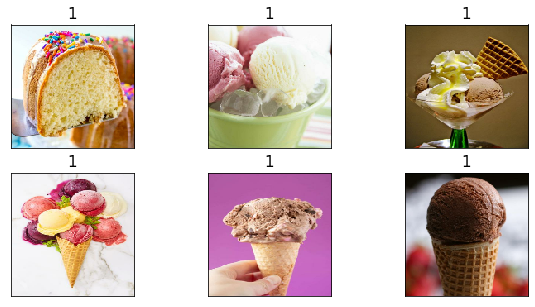

In [47]:
def load_and_preprocess(path, label):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [img_height, img_width])
    image /= 255.0

    return image, label

img_width, img_height = 150, 150

ds_images_labels = ds_files_labels.map(load_and_preprocess)

fig = plt.figure(figsize=(10, 5))

for i,example in enumerate(ds_images_labels):
    print(example[0].shape, example[1].numpy())
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(example[0])
    ax.set_title('{}'.format(example[1].numpy()), 
                 size=15)
    
plt.tight_layout()
#plt.savefig('ch13-catdog-dataset.pdf')
plt.show()

In [48]:
train_size = int(0.5 * len(file_list))
val_size = int(0.5 * len(file_list))

full_dataset = ds_images_labels.shuffle(buffer_size=1000)
train_dataset = full_dataset.take(train_size)
val_dataset = full_dataset.skip(train_size)

In [58]:
import shutil

root_dir = 'wafflecream'
waffle = '/waffle'
icecream = '/icecream'

#os.makedirs(root_dir +'/train' + waffle)
#os.makedirs(root_dir +'/train' + icecream)
#os.makedirs(root_dir +'/val' + waffle)
#os.makedirs(root_dir +'/val' + icecream)

currentCls = icecream
src = "wafflecream"+currentCls 

allFileNames = os.listdir(src)
np.random.shuffle(allFileNames)

#split into train and validation
train_FileNames, val_FileNames = np.array_split(np.array(allFileNames), 2)


train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]

print('Total images: ', len(allFileNames))
print('Training: ', len(train_FileNames))
print('Validation: ', len(val_FileNames))

for name in train_FileNames:
    shutil.copy(name, "wafflecream/train"+currentCls)

for name in val_FileNames:
    shutil.copy(name, "wafflecream/val"+currentCls)

Total images:  343
Training:  172
Validation:  171


In [59]:
train_dir = 'wafflecream/train'
validation_dir = 'wafflecream/val'

train_waffle_dir =  train_dir + '/waffle' 
train_icecream_dir = train_dir + '/icecream'  
validation_waffle_dir = validation_dir + '/waffle' 
validation_icecream_dir = validation_dir + '/icecream' 

In [60]:
num_waffle_tr = len(os.listdir(train_waffle_dir))
num_icecream_tr = len(os.listdir(train_icecream_dir))

num_waffle_val = len(os.listdir(validation_waffle_dir))
num_icecream_val = len(os.listdir(validation_icecream_dir))

total_train = num_waffle_tr + num_icecream_tr
total_val = num_waffle_val + num_icecream_val

3. Tensorflow Model Creation

Keras Initializers:

    -Glorot Uniform: 
    Draws samples from a uniform distribution within [-limit, limit], where limit = sqrt(6 / (fan_in + fan_out)) (fan_in is the number of input units in the weight tensor and fan_out is the number of output units).

    
Keras Regularizers:
    - L2 Regularizer 
    adds “squared magnitude” of coefficient as penalty term to the loss function. Helps to prevent overfitting

Activations 

    -relu
    Rectified Linear Unit activation is a nonlinear function that is good for learning complex functions with NNs
    
Keras Optimizers 

    -Adam
    Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
    
Keras Loss Functions 

    -sparse_categorical_crossentropy
    Utilized because the classes are mutually exclusive
    
Keras Metrics

    -accuracy
    Calculates how often predictions equals labels.

Depth:
The model is 6 layers deep to increase accuracy.

Width:
The width increases with the number of layers

In [61]:
train_image_generator=ImageDataGenerator(rescale=1./255)
Validation_image_generator=ImageDataGenerator(rescale=1./255)

Model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', 
                           kernel_initializer = 'glorot_uniform', 
                           kernel_regularizer = keras.regularizers.l2(0.0001),
                           input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',
                          kernel_regularizer = keras.regularizers.l2(0.0001)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu',
                          kernel_regularizer = keras.regularizers.l2(0.0001)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='softmax')
])

In [62]:
BATCH_SIZE=25
IMG_SHAPE  = 150
EPOCHS=20

Model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

val_data_gen = Validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=validation_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE),
                                                              class_mode='binary')

train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE), 
                                                           class_mode='binary')

Found 344 images belonging to 2 classes.
Found 350 images belonging to 2 classes.


4. TensorFlow Estimator Creation and Training


In [91]:
#my_estimator = tf.keras.estimator.model_to_estimator(Model)

In [86]:
Model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 36992)            

In [64]:
model_hist = Model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

Epoch 1/20
14/14 [==============================] - 14s 977ms/step - loss: 1.5507 - accuracy: 0.5029 - val_loss: 0.7761 - val_accuracy: 0.5262
Epoch 2/20
14/14 [==============================] - 13s 948ms/step - loss: 0.6866 - accuracy: 0.6886 - val_loss: 0.5918 - val_accuracy: 0.7442
Epoch 3/20
14/14 [==============================] - 14s 988ms/step - loss: 0.5776 - accuracy: 0.7771 - val_loss: 0.6206 - val_accuracy: 0.7558
Epoch 4/20
14/14 [==============================] - 14s 984ms/step - loss: 0.5196 - accuracy: 0.8143 - val_loss: 0.4536 - val_accuracy: 0.8517
Epoch 5/20
14/14 [==============================] - 14s 988ms/step - loss: 0.4192 - accuracy: 0.8629 - val_loss: 0.4938 - val_accuracy: 0.8285
Epoch 6/20
14/14 [==============================] - 14s 982ms/step - loss: 0.4251 - accuracy: 0.8514 - val_loss: 0.4325 - val_accuracy: 0.8517
Epoch 7/20
14/14 [==============================] - 13s 954ms/step - loss: 0.3754 - accuracy: 0.8600 - val_loss: 0.5235 - val_accuracy: 0.8459

NameError: name 'val_labels' is not defined

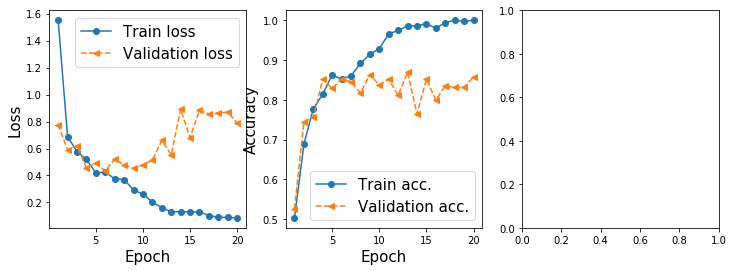

In [65]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions


hist = model_hist.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))

ax = fig.add_subplot(1, 3, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax.legend(fontsize=15)

ax = fig.add_subplot(1, 3, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(file_list, val_labels, clf=Model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

In [89]:
from tensorflow.keras.preprocessing import image

def testing_image(image_directory): 
    test_image = image.load_img(image_directory, target_size = (150, 150))
    plt.imshow(test_image)
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = Model.predict(x = test_image)
    if result[0][0]  == 1:
        prediction = 'Waffle'
    else:
        prediction = 'Ice Cream'
    return prediction

Ice Cream


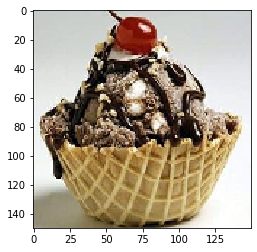

In [90]:
print(testing_image('test/wafflebowl.jpg')) 

5. TensorFlow Estimator Performance Evaluation and Visualization

We were able to achieve a validation accuracy of about 86%. This could likely be increased by adding more images, considering our total number of images was less than 1,000. 
